## <b> Face Detection Using MediaPipe - Google Face Detection Model </b>

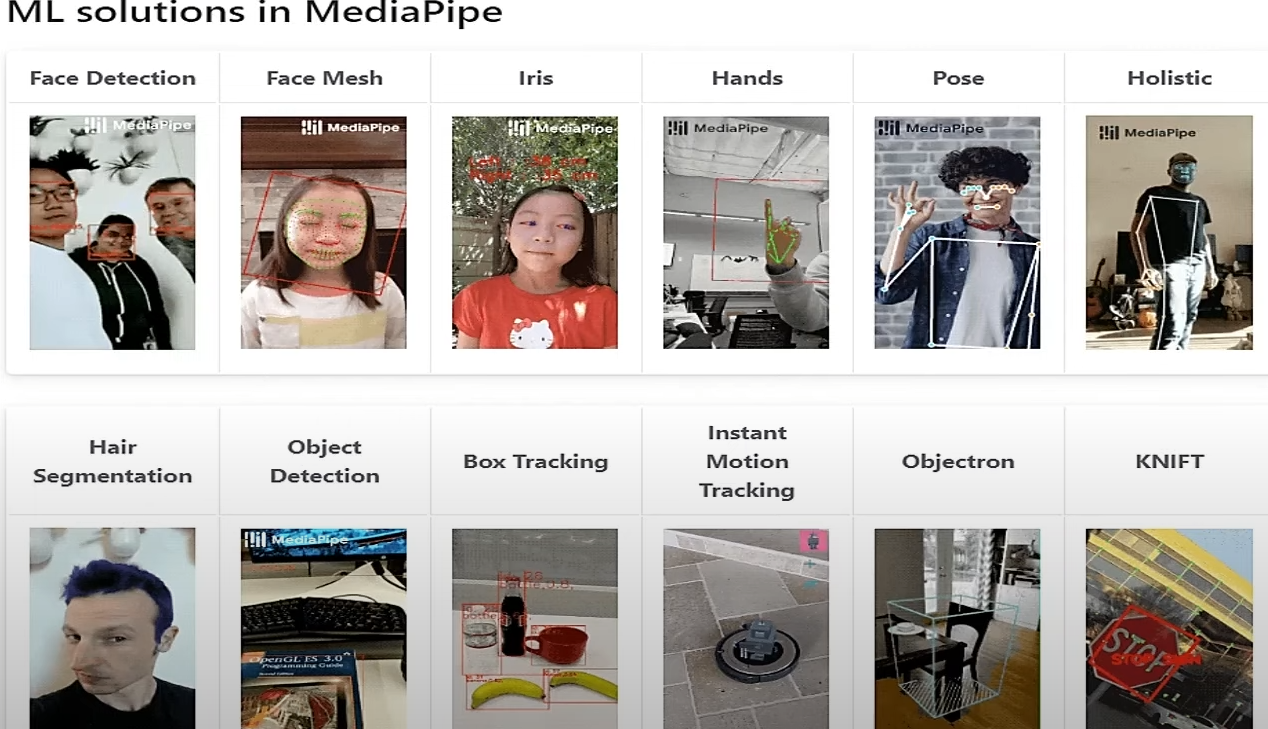
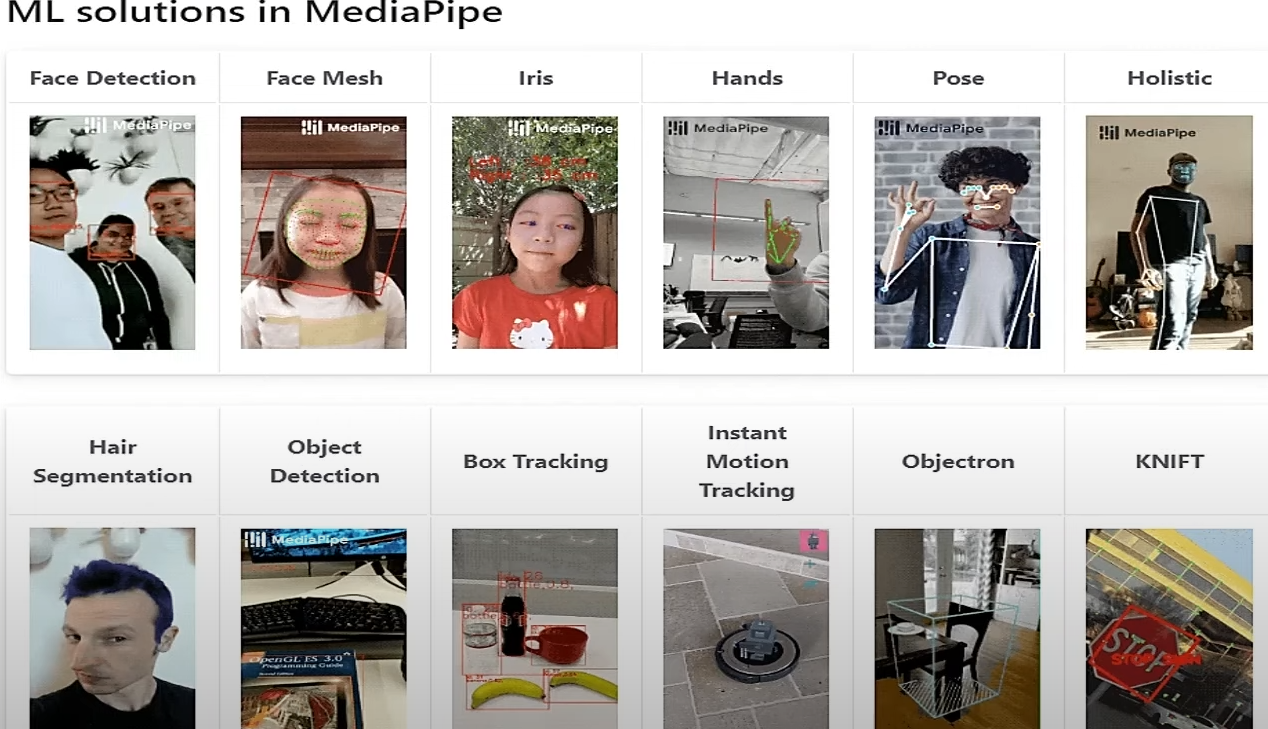

In [1]:
import mediapipe as mp
import cv2
import numpy

In [2]:
mp_face_det = mp.solutions.face_detection
mp_draw = mp.solutions.drawing_utils


In [3]:
face_dect = mp_face_det.FaceDetection(min_detection_confidence=1,model_selection=0)

cap = cv2.VideoCapture(0)

while cap.isOpened():
    r, frame = cap.read()
    frame = cv2.flip(frame,1)
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) #Bcoz mediapipe take RGB not BGR
    result = face_dect.process(frame) # coordinates
    frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR) #Bcoz mediapipe take RGB not BGR

    frame = cv2.resize(frame,(700,500))
    if r == True:
        for cr in result.detections:
            mp_draw.draw_detection(frame,cr)
            
            
        cv2.imshow("Face Det",frame)
        if cv2.waitKey(25) & 0xff == ord("p"):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()


## <b> Hand Tracking Using MediaPipe - Google Hand Tracking Model </b>
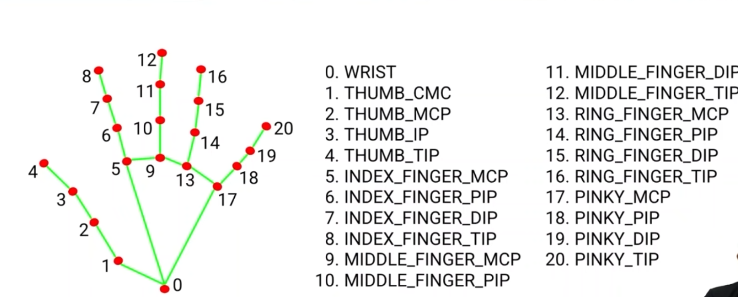

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing.style = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


cap = cv2.VideoCapture(0)

p = mp_hands.Hands(model_complexity=0,max_num_hands=2,min_detection_confidence=0.5)

while True:
    r, frame = cap.read()
    if r == True:
        frame = cv2.flip(frame,1)
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        result = p.process(frame)
        frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)

        if result.multi_hand_landmarks:
            for hand in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame,hand,mp_hands.HAND_CONNECTIONS)
        cv2.imshow("Hand Tracking",frame)
        if cv2.waitKey(25) & 0xff == ord("p"):
            break
    else:
        break
    
cap.release()
cv2.destroyAllWindows()
